In [36]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [90]:
stock_prices = pd.read_csv("datasets/fit_quotes.csv")
time_series = stock_prices.close.iloc[::-1].tolist()


In [93]:
import csv

with open('datasets/brown.csv', 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)
time_series = [float(x[0]) for x in your_list]    

In [116]:
import csv

with open('datasets/fc_sales.csv', 'r') as f:
  reader = csv.reader(f)
  your_list = list(reader)
time_series = [float(x[0]) for x in your_list] 

In [113]:
from random import choice
start = 0;
time_series = []
for i in range(10000):
    time_series.append(start)
    start += choice([-1, 1])

In [100]:
time_series=[]
from math import radians
for i in range(1000):
    time_series.append(np.sinc(radians(i)))

In [104]:
from random import randint
start = 0;
time_series = []
for i in range(2000):
    time_series.append(randint(-3, 3))

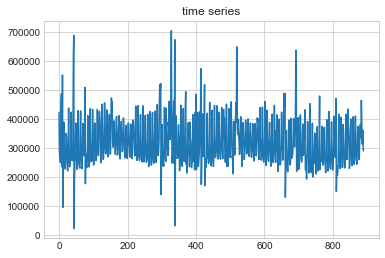

In [117]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

In [131]:
mean = np.mean(time_series)
print(f"mean={mean}")

mean=315578.3314606742


In [132]:
Yt = [x - mean for x in time_series]
print(Yt[:10])

[107498.66853932582, -26268.331460674177, -41769.33146067418, -55001.33146067418, -65989.33146067418, -19650.331460674177, 134372.66853932582, 169710.66853932582, -80608.33146067418, -51065.33146067418]


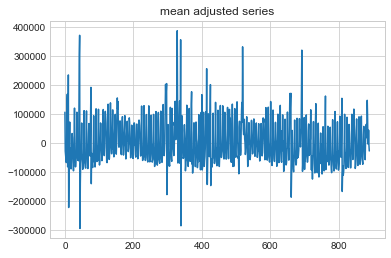

In [133]:
plt.plot(np.array(range(len(Yt))), Yt)
plt.title("mean adjusted series")
plt.show()

In [134]:
_Zt = [0]
for t in range (1, len(Yt)):
    _Zt.append(_Zt[t-1] + Yt[t-1])
print(_Zt[:20])


[0, 107498.66853932582, 81230.33707865165, 39461.00561797747, -15540.325842696708, -81529.65730337088, -101179.98876404506, 33192.67977528076, 202903.34831460658, 122295.01685393241, 71229.68539325823, 307173.35393258405, 86353.02247190988, 8734.6910112357, 21380.359550561523, 94961.02808988735, 70890.69662921317, 54655.36516853899, -30163.966292135185, -117919.29775280936]


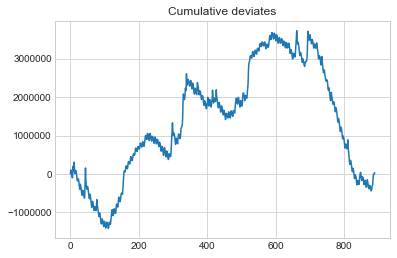

In [135]:
plt.plot(range(len(_Zt)), _Zt)
plt.title("Cumulative deviates")
plt.show()

In [136]:
def maxs(series, t):
    return max([s for s in series[:t]])
def mins(series, t):
    return min([s for s in series[:t]])
Rt = [maxs(_Zt, t) - mins(_Zt, t) for t in range(1, len(_Zt))]
print(Rt[:10])


[0, 107498.66853932582, 107498.66853932582, 107498.66853932582, 123038.99438202253, 189028.3258426967, 208678.65730337088, 208678.65730337088, 304083.33707865165, 304083.33707865165]


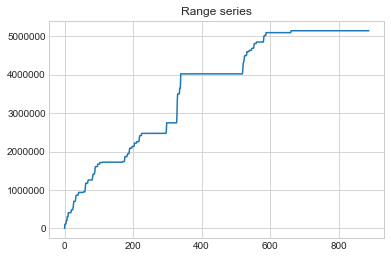

In [137]:
plt.plot(np.array(range(len(Rt))), Rt)
plt.title("Range series")
plt.show()

In [16]:
pd.DataFrame(data=Rt).tail()

,0
1856,1679.036521
1857,1679.036521
1858,1679.036521
1859,1679.036521
1860,1679.036521


In [17]:
print(len(Rt))

1861


In [ ]:
#from math import sqrt
#Stc = [sqrt(sum([(time_series[i] - np.mean(time_series[:n]))**2 for i in range(n)]) * 1.0 / n) for n in range(1, 500)]
#plt.plot(np.array(range(len(Stc))), Stc)
#plt.title("Standard deviation")
#plt.show()

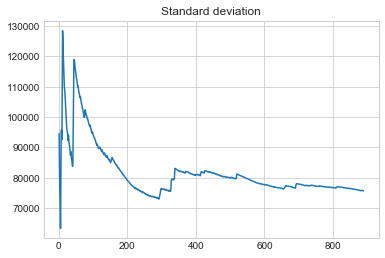

In [138]:
St = pd.DataFrame(time_series).rolling(len(time_series),min_periods=2).std()
plt.plot(np.array(range(len(St))), St)
plt.title("Standard deviation")
plt.show()

In [ ]:
St = [x[0] for x in St.values.tolist()]

In [ ]:
print(len(Rt), Rt[:10], len(St), St[:10])

In [ ]:
RoverS = [Rt[t]/St[t] for t in range(100,len(St)-1)]
plt.plot(np.array(range(len(RoverS))), RoverS)
plt.title("R over S")
plt.show()

In [ ]:
plt.plot(np.array(range(len(RoverS))), RoverS)
plt.yscale("log")
plt.xscale("log")
plt.title("log log R over S")
plt.show()

In [ ]:
rovers = pd.DataFrame(RoverS)
count, division = np.histogram(RoverS, bins =10000)
RoverS_hist = rovers.hist(bins=division)

In [ ]:
total = sum(count)

def E(series, length):
    count, division = np.histogram(series[:length], bins=10000, density=True)
    total = sum(count)
    
    return sum([division[i] * 1.0 * count[i]/total for i in range(len(count))])

Ers = E(RoverS, len(RoverS))
print(f"E(R/S)= {Ers}")

from math import log
H = log(Ers, len(RoverS))
print(f"H = {H}")

In [ ]:
C=Ers/(10000**H)
log(Ers/C, len(RoverS))

In [ ]:
E_RoverS = [E(RoverS, t) for t in range(1, len(RoverS))]
plt.plot(np.array(range(len(E_RoverS))), E_RoverS)
plt.title("E(R/S)")
plt.show()

In [ ]:
Hs=[log(E(RoverS[t], t), t) for t in range(len(RoverS)-100,len(RoverS))]
plt.plot(np.array(range(len(Hs))), Hs)
plt.title("H over time")
plt.show()

890 1
890 2
890 3
890 4
890 5
890 6
890 7
890 8
890 9


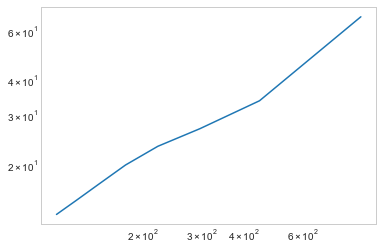

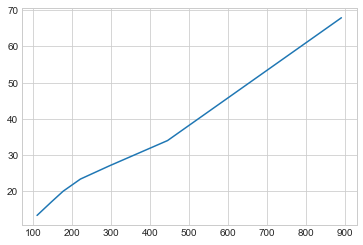

In [130]:
def E(series, length):
    count, division = np.histogram(series[:length], bins=1000)
    total = sum(count)
    
    return sum([division[i] * 1.0 * count[i]/total for i in range(len(count))])

def RdivS(s_time_series):
    mean = 1.0*sum(s_time_series)/len(s_time_series)
    _Yt = [x - mean for x in s_time_series]
    _Zt = np.cumsum(_Yt).tolist()
    _R = max(_Zt) - min(_Zt)
    _S = float(pd.DataFrame(s_time_series).std())
    return _R/_S

def RdivS_by_slice(full_time_series, num_slices):
    print (len(full_time_series), num_slices)
    rc = []
    slice_size = int(len(full_time_series)/num_slices)
    
    assert slice_size > 100
    
    for i in range(0, len(full_time_series)-slice_size+1):
        result = RdivS(full_time_series[i:i+slice_size])
        rc.append(result)
    
    return E(rc, len(rc)), slice_size
        
    return sum(rc) / len(rc), slice_size

rs = []
size = []
for i in range(1,20):
    try:
        rs_, size_ = RdivS_by_slice(time_series, i)
        rs.append(float(rs_))
        size.append(size_)
    except Exception:
        break
        
 
plt.plot(size, rs)
plt.xscale("log")
plt.yscale("log")
plt.show()

plt.plot(size, rs)
plt.show()

In [129]:
from scipy import stats
from math import log
slope, intercept, r_value, p_value, std_err = stats.linregress( [log(x, 10) for x in size], [log(x, 10) for x in rs])

print(f"slope:{slope},intercept:{intercept},r_value:{r_value},p_value={p_value},std_err={std_err}")


slope:0.7427852600528859,intercept:-0.3880221394824477,r_value:0.9944845637926522,p_value=4.1771625667252715e-07,std_err=0.03198120902711902


In [ ]:
H = log(971.0419917934615, len(time_series))

In [ ]:
print(H)